# Credit Card Fraud Detection

When discussing financial transactions and consumer security on digital platforms, the
current market is defined by everyday credit card purchases, which contributes to a signi-
ficant increase in different types of fraud. Considering these perspectives, the Credit Card
Fraud Detection dataset was chosen to be used in order to understand the process behind
this application standard used by global companies. Therefore, the aim of Task 1 is to
develop a neural network for credit card fraud detection by understanding the pattern of
fraudulent activities.

In [17]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

## EDA

In [18]:
# Load the dataset using pandas read_csv 

df = pd.read_csv('credit_card_fraud_dataset.csv')

In [19]:
# Display dataset shape of the datasets

df.shape

(100000, 7)

In [20]:
# Display first 10 rows of the dataset 

df.head(10)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
5,6,2024-08-30 01:52:35.462867,3086.22,302,purchase,New York,0
6,7,2024-01-02 11:31:35.462875,1466.90,902,refund,Philadelphia,0
7,8,2024-05-12 12:25:35.462885,917.21,266,purchase,New York,0
8,9,2023-11-16 02:20:35.462894,1625.73,32,refund,Chicago,0
9,10,2023-10-24 06:51:35.462901,662.07,193,purchase,Dallas,0


In [21]:
# Understanding the datatypes of all the features columns of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [22]:
# Statistical Analysis of the dataset 

df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [23]:
# Checking null values present in the dataset

df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [24]:
# Reset index columns to Transaction ID

df = df.set_index('TransactionID')

df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
TransactionID,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0


In [25]:
# Find the Balance in the target 

df['IsFraud'].value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

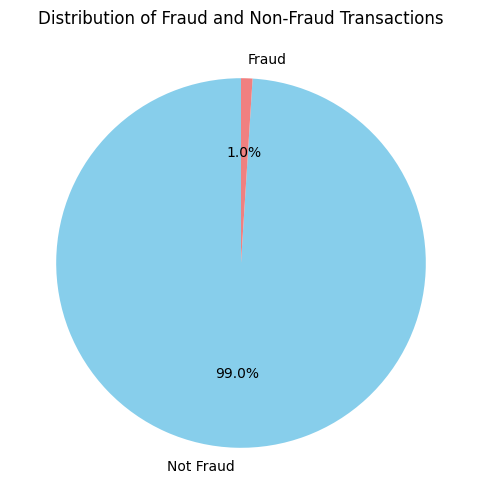

In [26]:
#Pie Chart representation to understand balance of the target columns
comparing_values = df['IsFraud'].value_counts()

labels = comparing_values.index.map({0: "Not Fraud", 1: "Fraud"})

plt.figure(figsize=(6, 6))
plt.pie(
    comparing_values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title("Distribution of Fraud and Non-Fraud Transactions")
plt.show()

In [27]:
# Different types of locations and locations that appear most in the dataset

df['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

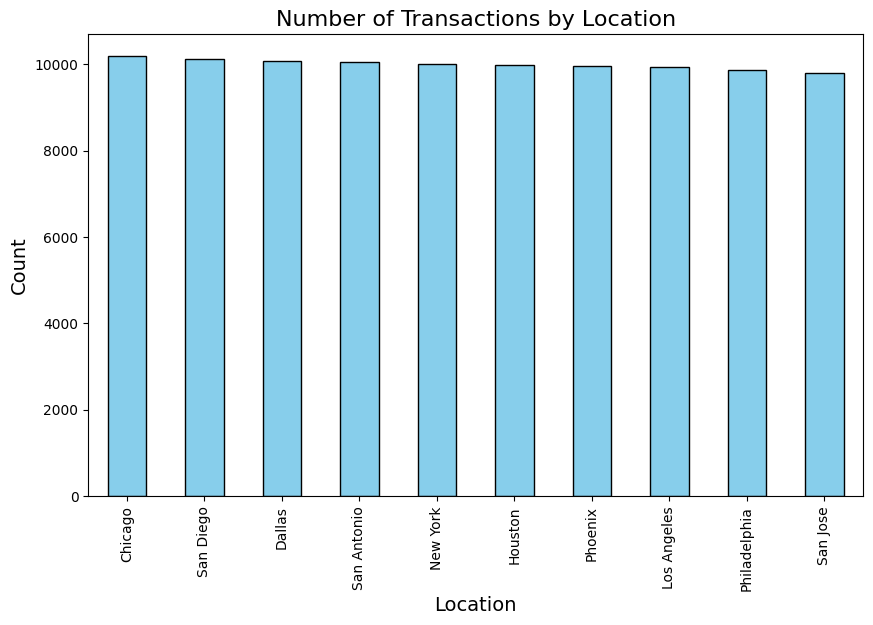

In [28]:
# Graphical represention of the location
location_total = df['Location'].value_counts()

plt.figure(figsize=(10, 6))
location_total.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Transactions by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [29]:
# Total Amount related to  TransactionType 

df.groupby(['TransactionType'])['Amount'].sum()

TransactionType
purchase    1.246949e+08
refund      1.250144e+08
Name: Amount, dtype: float64

In [30]:
# Verify data range of dataset 

least_recent_date = df['TransactionDate'].min()
most_recent_date = df['TransactionDate'].max()


print("Data range :", least_recent_date,"until",most_recent_date)

Data range : 2023-10-21 09:28:35.824439 until 2024-10-21 09:20:35.961088


In [31]:
# Total of Amount per  distinct TransactionDate in descending order 

df_date = df.copy()

df_date['TransactionDate'] = pd.to_datetime(df_date['TransactionDate']).dt.date


transaction_date_amount = df_date.groupby(['TransactionDate'])['Amount'].sum().sort_index(ascending=True)

transaction_date_amount

TransactionDate
2023-10-21    369760.87
2023-10-22    717626.99
2023-10-23    615269.75
2023-10-24    671223.41
2023-10-25    618389.80
                ...    
2024-10-17    681295.57
2024-10-18    704287.87
2024-10-19    590240.51
2024-10-20    652894.65
2024-10-21    280354.61
Name: Amount, Length: 367, dtype: float64

In [38]:
# Amount per Transaction Date

fig = px.bar(transaction_date_amount, x=transaction_date_amount.index, y="Amount")
fig.update_layout(
      title={
        'text': "Total Amount per TransactionDate",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="TransactionDate",
    yaxis_title="Amount"
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [39]:
# Total of Refund and Purchase
transaction_counts = df.groupby(['Location', 'TransactionType']).size().reset_index(name='Count')

transaction_counts
fig = px.histogram(transaction_counts, x="Location", y="Count", color="TransactionType")
fig.update_layout(
      title={
        'text': "Total of Transactions Type per Location",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Locations",
    yaxis_title="Total of Transactions"

)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [40]:
# Convert 'TransactionDate' to datetime and extract date-related features

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Hour'] = df['TransactionDate'].dt.hour

df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour
TransactionID,,,,,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,3,14
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,19,13
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,8,10
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,13,23
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,12,18
...,...,...,...,...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,2024,6,7,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,2023,10,22,23
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,2024,5,31,19


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionDate  100000 non-null  datetime64[ns]
 1   Amount           100000 non-null  float64       
 2   MerchantID       100000 non-null  int64         
 3   TransactionType  100000 non-null  object        
 4   Location         100000 non-null  object        
 5   IsFraud          100000 non-null  int64         
 6   Year             100000 non-null  int32         
 7   Month            100000 non-null  int32         
 8   Day              100000 non-null  int32         
 9   Hour             100000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(2)
memory usage: 6.9+ MB


In [42]:
# One-hot encode categorical features

df = pd.get_dummies(df, columns=['TransactionType', 'Location'], drop_first=True)

In [43]:
# Define X and y

X = df.drop(['IsFraud','TransactionDate'], axis=1).to_numpy() # Drop non-features
y = df['IsFraud'] # Target variable 

y = np.reshape(y,(-1,1))

print(X.shape)
print(y.shape)

(100000, 16)
(100000, 1)


In [44]:
# Standardize features 

scaler =  StandardScaler()
X_features = scaler.fit_transform(X)
X_features

array([[ 1.17316072,  0.64535719,  0.49297417, ...,  2.9897127 ,
        -0.33538511, -0.32971034],
       [ 0.11274012, -1.3600847 ,  0.49297417, ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       [-1.187661  , -0.37295009,  0.49297417, ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       ...,
       [ 0.65963778,  0.65228445,  0.49297417, ...,  2.9897127 ,
        -0.33538511, -0.32971034],
       [ 0.86916923,  0.49295746,  0.49297417, ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       [-0.6241661 ,  0.60033   ,  0.49297417, ..., -0.3344803 ,
        -0.33538511, -0.32971034]])

In [45]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 16)
(30000, 16)
(70000, 1)
(30000, 1)


In [46]:
# oversampling using SMOTE

smote = SMOTE()

X_train_s, y_train_s = smote.fit_resample(X_train, y_train)


## Building Neural Network 

##### The code above was based in Lab 06 of Programming Programming and Mathematics for Artificial Intelligence from Dr. Atif Riaz

In [50]:
##Neural Network From Scratch

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes1,
                 no_of_hidden_nodes2,
                 learning_rate,
                 optimizer="mini_batch_sgd",  # Choose optimizer between mini batch and sgd
                 l1_lambda=0.0,               # L1 regularization strength which can be adjusted according to the accuracy
                 l2_lambda=0.0,               # L2 regularization strength also can ve adjusted according to the final accuracy
                 hidden_activation="relu",
                 output_activation="sigmoid",
                 dropout_rate=0.0  # Dropout rate and preferred drop out can be set as 0.5
                ):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes1 = no_of_hidden_nodes1
        self.no_of_hidden_nodes2 = no_of_hidden_nodes2
        self.learning_rate = learning_rate
        self.optimizer = optimizer.lower()  # Convert to lowercase for consistency
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.dropout_rate = dropout_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        X = truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5)

        # Create wih1 with shape [hidden1 x in]
        self.wih1 = X.rvs(self.no_of_hidden_nodes1 * self.no_of_in_nodes).reshape(
            (self.no_of_hidden_nodes1, self.no_of_in_nodes)
        )

        # Create wh1h2 with shape [hidden2 x hidden1]
        self.wh1h2 = X.rvs(self.no_of_hidden_nodes2 * self.no_of_hidden_nodes1).reshape(
            (self.no_of_hidden_nodes2, self.no_of_hidden_nodes1)
        )

        # Create who with shape [out from last layer x hidden2]
        self.who = X.rvs(self.no_of_out_nodes * self.no_of_hidden_nodes2).reshape(
            (self.no_of_out_nodes, self.no_of_hidden_nodes2)
        )


### Sigmoid training

In [ ]:
# Define the neural network
nn = NeuralNetwork(no_of_in_nodes=16, 
                               no_of_out_nodes=1, 
                               no_of_hidden_nodes=4,activation_function="sigmoid",
                               learning_rate=0.01)


nn.train(X_train_s, y_train_s)

y_hat = simple_network.run(X_test)

y_hat[y_hat >0.5]=1
y_hat[y_hat<0.5] =0
print(sum(y_hat==y_test)/len(y_hat))

NameError: name 'activation_function' is not defined

### Relu training

In [ ]:
# Define the neural network
nn = NeuralNetwork(no_of_in_nodes=16, 
                               no_of_out_nodes=1, 
                               no_of_hidden_nodes=4,activation_function="relu",
                               learning_rate=0.01)


nn.train(X_train, y_train)

y_hat = simple_network.run(X_test)